# Atividade Prática: Contagem da Pontuação dos Dados

![](../../data/imagem/banner-pos-2022.jpg)

## Objetivo

O objetivo é identificar a pontuação de todas as faces dos dados da imagem abaixo e então realizar a contagem e soma dos valores.

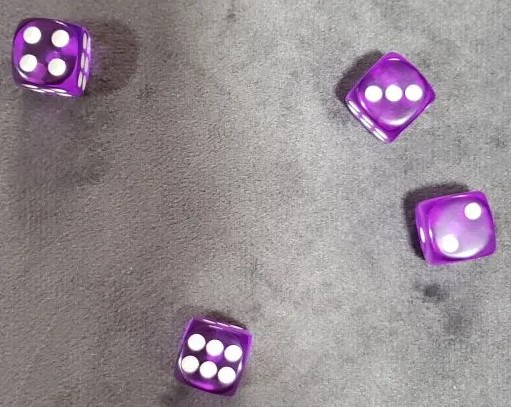

# Importando Bibliotecas

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

PATH_DIR = "../../data/imagem"

img_path = [
    os.path.join(PATH_DIR, f"dados_0{i}.jpg") for i in range(1,5)
]

# Ilustrandos as Imagens dos Dados

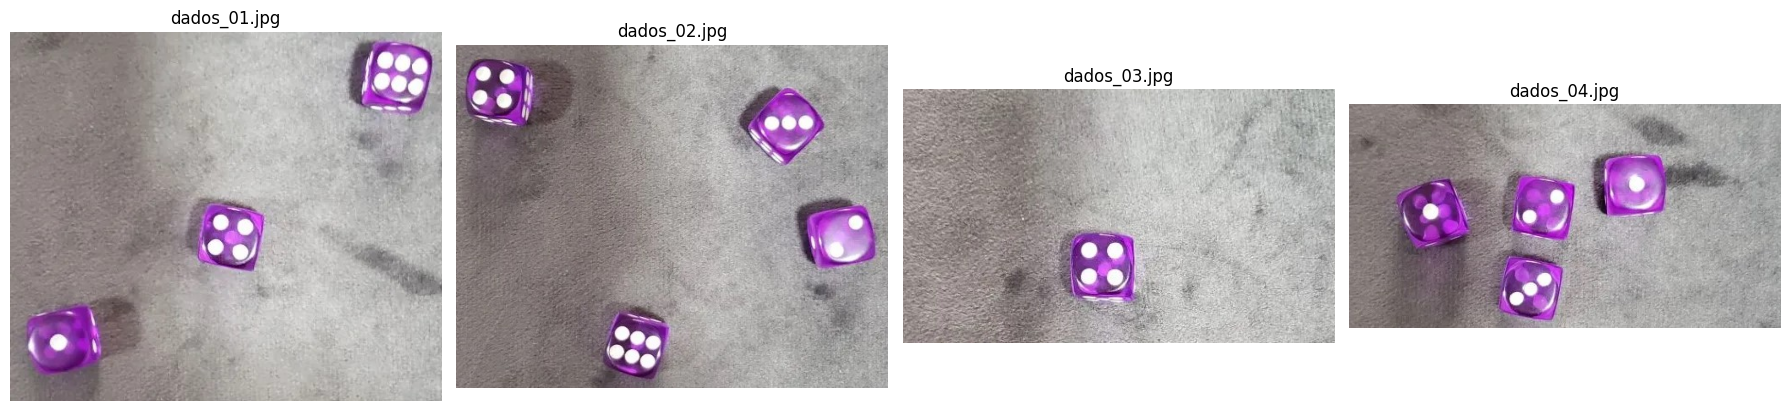

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(18,5))

for i in range(4):
    img = cv2.imread(img_path[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ax[i].imshow(img)
    ax[i].set_title(f"dados_0{i+1}.jpg")
    ax[i].axis('off')
plt.tight_layout()
plt.show()

# Pipline

In [19]:
def read_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def binarized(img_gray):
    th, img_binarizada = cv2.threshold(img_gray, 230, 255, cv2.THRESH_BINARY)
    return img_binarizada

def morphological_transformation(img_blur):
    # Utiliza a transformação morfológica do tipo "ellipse" para realizar a erosão.
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

    # Aplica a erosão na imagem. Com 4 iterações foi possível remover os ruídos/reflexos.
    img_erosao = cv2.erode(img_blur, kernel, iterations = 4)

    # Aplica a dilatação na imagem. Com 3 iterações já é possível perceber os círculos.
    img_dilate = cv2.dilate(img_erosao, kernel, iterations = 3)

    # Aplica o filtro gaussiano (matriz 3x3) sobre a imagem erodida.
    img_gaussian_blur = cv2.GaussianBlur(img_dilate, (3, 3), 0)

    return img_gaussian_blur

def counting(img_gaussian_blur):
    contours, hierarchy = cv2.findContours(img_gaussian_blur, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    return contours    

def draw_and_plot(img, contours):
    img_countours = img.copy()
    cv2.drawContours(img_countours, contours, -1, (0, 255, 0), 3)

    plt.imshow(img_countours)
    plt.axis('off')
    plt.show()

def run(img_path):
    img = read_img(img_path)

    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    img_binarizada = binarized(img_gray)

    img_blur = cv2.medianBlur(img_binarizada, 3)

    img_gaussian_blur = morphological_transformation(img_blur)

    contours = counting(img_gaussian_blur)
    print("Total da pontuação: '{}' ".format(len(contours)))

    draw_and_plot(img, contours)

    print('#'*50)

Total da pontuação: '11' 


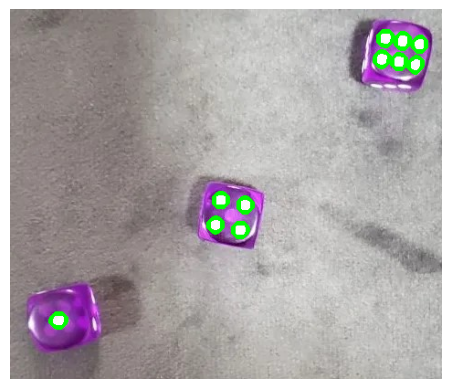

##################################################
Total da pontuação: '15' 


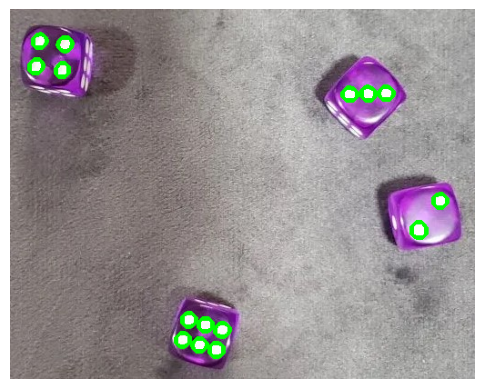

##################################################
Total da pontuação: '4' 


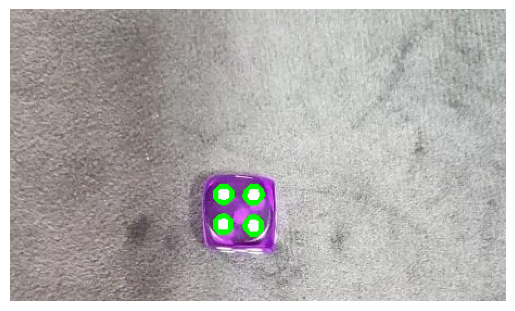

##################################################
Total da pontuação: '7' 


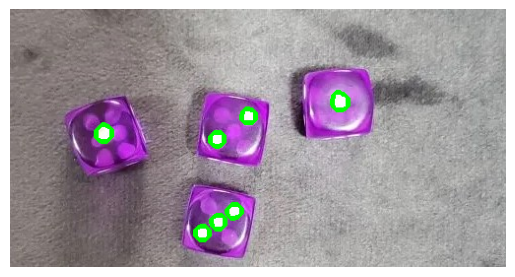

##################################################


In [20]:
for i in range(4):
    run(img_path[i])    